<a href="https://colab.research.google.com/github/JessicaZezzz/CNN/blob/main/proposed_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

In [3]:
#import libraries to look at the images
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
data_src="/content/drive/MyDrive/Dataset_2/"

First we load each image into a list, and save the corresponding label in another list

In [5]:
data=[]
y=[]
for d in os.listdir(data_src):
    for file in os.listdir(data_src+d):
        data.append(Image.open(data_src+d+'/'+file))
        y.append(d)

Convert each image into a numpy array

In [6]:
X=[]
for im in data:
    X.append(np.array(im))

In [7]:
#Convert the list of data into an array
X=np.array(X)

In [8]:
X.shape

(6400, 128, 128)

In [9]:
#Divide by 255 to standardize the values between 0 and 1
X=X/255

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical

In [12]:
#Let's count how many of each category we have
non=0
mild=0
mod=0
vm=0
for cat in y:
    if cat=="Mild_Demented":
        mild+=1
    elif cat=="Moderate_Demented":
        mod+=1
    elif cat=="Non_Demented":
        non+=1
    else:
        vm+=1
print("Non Demented: ",non)
print("Very Mild: ",vm)
print("Moderate: ",mod)
print("Mild :",mild)

Non Demented:  3200
Very Mild:  2240
Moderate:  64
Mild : 896


In [13]:
#Now we change these values to numerical ones so that we can use to_categorical
#0 will be non, 1 will be very mild, 2 will be mild, 3 will be moderate
y_num=[]
for cat in y:
    if cat=="Mild_Demented":
        y_num.append(2)
    elif cat=="Moderate_Demented":
        y_num.append(3)
    elif cat=="Non_Demented":
        y_num.append(0)
    else:
        y_num.append(1)

In [14]:
#convert to a categorical target as expected by keras
y=to_categorical(y_num)

In [15]:
y.shape

(6400, 4)

In [16]:
#Reshape to use in a neural network
X=X.reshape(6400,128,128,1)

In [17]:
#Split into a training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4800, 128, 128, 1) (1600, 128, 128, 1) (4800, 4) (1600, 4)


**Proposed Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
cnn = Sequential()
cnn.add(Conv2D(64,(3,3),padding="same",activation='relu',input_shape=X_train.shape[1:]))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.3))
cnn.add(Conv2D(32, (2,2), activation='relu'))
cnn.add(Conv2D(32, (2,2), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.5))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(4, activation='softmax'))

In [19]:
#yg model ini dirun
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
cnn = Sequential()
cnn.add(Conv2D(64,(3,3),padding="same",activation='relu',input_shape=X_train.shape[1:]))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(Dropout(0.75))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(32, (2,2), activation='relu'))
cnn.add(Conv2D(32, (2,2), activation='relu'))
cnn.add(Dropout(0.8))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(4, activation='softmax'))

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 32)        9248      
                                                        

In [21]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [22]:
#Train the Convolutional Neural Network on the data
history=cnn.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
150/150 [==============================] - 685s 5s/step - loss: 1.0731 - accuracy: 0.4842 - val_loss: 1.2533 - val_accuracy: 0.4919
Epoch 2/20
150/150 [==============================] - 687s 5s/step - loss: 1.0207 - accuracy: 0.5023 - val_loss: 1.2340 - val_accuracy: 0.3625
Epoch 3/20
150/150 [==============================] - 687s 5s/step - loss: 0.9551 - accuracy: 0.5360 - val_loss: 1.1814 - val_accuracy: 0.4737
Epoch 4/20
150/150 [==============================] - 701s 5s/step - loss: 0.9274 - accuracy: 0.5608 - val_loss: 1.0664 - val_accuracy: 0.5394
Epoch 5/20
150/150 [==============================] - 702s 5s/step - loss: 0.9007 - accuracy: 0.5617 - val_loss: 1.1000 - val_accuracy: 0.5138
Epoch 6/20
150/150 [==============================] - 698s 5s/step - loss: 0.8757 - accuracy: 0.5927 - val_loss: 1.0029 - val_accuracy: 0.5744
Epoch 7/20
105/150 [====================>.........] - ETA: 3:16 - loss: 0.8214 - accuracy: 0.6104

KeyboardInterrupt: ignored

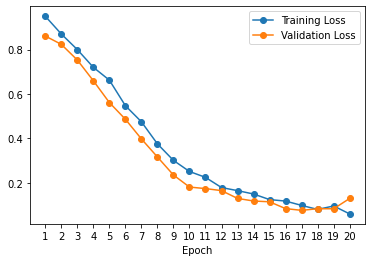

In [ ]:
#Plot to see how the loss function changed
plt.plot(range(1,21),history.history['loss'],marker="o")
plt.plot(range(1,21),history.history['val_loss'],marker="o")
plt.legend(["Training Loss","Validation Loss"])
plt.xlabel("Epoch")
plt.xticks(range(1,21))
plt.show()

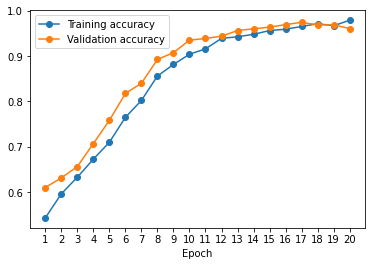

In [ ]:
#plot to see how the accuracy changed
plt.plot(range(1,21),history.history['accuracy'],marker="o")
plt.plot(range(1,21),history.history['val_accuracy'],marker="o")
plt.legend(["Training accuracy","Validation accuracy"])
plt.xlabel("Epoch")
plt.xticks(range(1,21))
plt.show()

In [ ]:
#Get a prediction from the neural network
y_pred=cnn.predict(X_test)

In [ ]:
#The prediction is a sequence of 4 probabilities. We choose the label with the highest probability
y_val=[]
for y in y_pred:
    y_val.append(np.argmax(y))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#Convert back to labels 0-3
y_true=[]
for y in y_test:
    y_true.append(np.argmax(y))

In [ ]:
#Let's see how the predictions did
print(confusion_matrix(y_true,y_val))

[[741  36  10   0]
 [  8 554  17   1]
 [  0   1 213   0]
 [  0   0   0  19]]


In [ ]:
print(classification_report(y_true,y_val))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       787
           1       0.94      0.96      0.95       580
           2       0.89      1.00      0.94       214
           3       0.95      1.00      0.97        19

    accuracy                           0.95      1600
   macro avg       0.94      0.97      0.96      1600
weighted avg       0.96      0.95      0.95      1600



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy on test data: ",accuracy_score(y_true,y_val))

Accuracy on test data:  0.954375


By using a convolutional network we could get 97.81% accuracy on a held out test set with no errors at all on moderate dementia.
(Note: This may vary slightly on different runs)